In [0]:
!pip3 install pydot
#!apt-get install graphviz
from keras.utils import plot_model

import numpy as np
import pandas as pd
%matplotlib inline

from google.colab import files
import uuid
from google.colab import auth


def fileUploadToGCS(bucket_name='colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002'):
  auth.authenticate_user()
  project_id = 'api-project-834845844624'
  !gcloud config set project {project_id}

  # Make a unique bucket to which we'll upload the file.
  # (GCS buckets are part of a single global namespace.)
  #bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())
  #print bucket_name

  !gsutil cp wiki-news-300d-1M.vec gs://{bucket_name}/wiki-news-300d-1M.vec
    
def fileDownloadFromGCS():
  auth.authenticate_user()
  project_id = 'api-project-834845844624'
  !gcloud config set project {project_id}
  !gsutil cp gs://"colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002"/lyrics.csv.zip ./lyrics.csv.zip
  #!gsutil cp gs://"colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002"/wiki-news-300d-1M.vec ./wiki-news-300d-1M.vec
  !gsutil cp gs://"colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002"/GoogleNews-vectors-negative300-SLIM.bin ./GoogleNews-vectors-negative300-SLIM.bin

#fileUploadToGCS()
fileDownloadFromGCS()
!unzip lyrics.csv.zip

import urllib
url = "https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki-news-300d-1M.vec.zip"
urllib.request.urlretrieve(url,"wiki-news-300d-1M.vec.zip")
!unzip wiki-news-300d-1M.vec.zip




Using TensorFlow backend.


Updated property [core/project].
Copying gs://colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002/lyrics.csv.zip...
\ [1 files][ 98.5 MiB/ 98.5 MiB]                                                
Operation completed over 1 objects/98.5 MiB.                                     
Copying gs://colab-sample-bucket-7491b53e-49be-11e8-b0d5-0242ac110002/GoogleNews-vectors-negative300-SLIM.bin...
/ [1 files][345.3 MiB/345.3 MiB]                                                
Operation completed over 1 objects/345.3 MiB.                                    
Archive:  lyrics.csv.zip
  inflating: lyrics.csv              
Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [0]:
!ls -lah

import numpy as np
import pandas as pd
%matplotlib inline



total 3.5G
drwxr-xr-x 1 root root 4.0K Dec  6 05:55 .
drwxr-xr-x 1 root root 4.0K Dec  6 05:53 ..
-rw-r--r-- 1 root root 2.5K Dec  6 05:54 adc.json
drwxr-xr-x 1 root root 4.0K Dec  6 05:54 .config
-rw-r--r-- 1 root root 346M Dec  6 05:55 GoogleNews-vectors-negative300-SLIM.bin
-rw-r--r-- 1 root root 310M Jan 11  2017 lyrics.csv
-rw-r--r-- 1 root root  99M Dec  6 05:54 lyrics.csv.zip
drwxr-xr-x 2 root root 4.0K Dec  4 21:01 sample_data
-rw-r--r-- 1 root root 2.2G Mar 14  2018 wiki-news-300d-1M.vec
-rw-r--r-- 1 root root 651M Dec  6 05:55 wiki-news-300d-1M.vec.zip


In [0]:
df = pd.read_csv('lyrics.csv')

df.shape

(362237, 6)

In [0]:
df.dropna(inplace=True)
df.shape


(266556, 6)

In [0]:
top_100_artists = df['artist'].value_counts()[:100].index
#df['artist'].value_counts()

In [0]:
df = df[df['artist'].isin(top_100_artists)]
df.shape

(35140, 6)

In [0]:
df.shape
df.head()
l = df['lyrics'].head(1).values[0]
len(l.splitlines())


50

In [0]:
def lower(x):
    try:
        return " ".join(x.lower() for x in x.split())
    except:
        print(x)
        return
      
def lower_han(xx):
    try:
        lines = xx.splitlines()
        toked = [" ".join(w.lower() for w in x.split()) for x in lines]
        return "\n".join(toked)
    except:
        return


dfhan = df.copy()

df['lyrics'] = df['lyrics'].apply(lower)

dfhan['lyrics'] = dfhan['lyrics'].apply(lower_han)

l = dfhan['lyrics'].head(1).values[0]

print(df.shape)
print(len(l.splitlines()))
print(l)

(35140, 6)
50
oh baby, how you doing?
you know i'm gonna cut right to the chase
some women were made but me, myself
i like to think that i was created for a special purpose
you know, what's more special than you? you feel me
it's on baby, let's get lost
you don't need to call into work 'cause you're the boss
for real, want you to show me how you feel
i consider myself lucky, that's a big deal
why? well, you got the key to my heart
but you ain't gonna need it, i'd rather you open up my body
and show me secrets, you didn't know was inside
no need for me to lie
it's too big, it's too wide
it's too strong, it won't fit
it's too much, it's too tough
he talk like this 'cause he can back it up
he got a big ego, such a huge ego
i love his big ego, it's too much
he walk like this 'cause he can back it up
usually i'm humble, right now i don't choose
you can leave with me or you could have the blues
some call it arrogant, i call it confident
you decide when you find on what i'm working with
damn 

In [0]:
#df['lyrics'] = df['lyrics'].str.replace('[^\w\s]',' ')
dfhan['lyrics'] = dfhan['lyrics'].str.replace('[^\w\s]',' ')
l = dfhan['lyrics'].head(1).values[0]
len(l.splitlines())

50

In [0]:
#df.head
dfhan.head(5)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing \nyou know i m gonna cu...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy \nit s like you see...
2,2,honesty,2009,beyonce-knowles,Pop,if you search\nfor tenderness\nit isn t hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i\n verse 1 \nif i wrote...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it s po...


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stopwords(x):
    try:
        return " ".join(x for x in x.split() if x not in stop)
    except:
        return

#df['lyrics'] = df['lyrics'].apply(remove_stopwords)


def lower_han(xx):
    try:
        lines = xx.splitlines()
        toked = [" ".join(w.lower() for w in x.split()) for x in lines]
        return "\n".join(toked)
    except:
        return
      
def remove_stopwords_han(xx):
    try:
        lines = xx.splitlines()
        toked = [" ".join(w for w in x.split() if w not in stop) for x in lines]
        return "\n".join(toked)
    except:
        return

#df['lyrics'] = df['lyrics'].apply(remove_stopwords)
dfhan['lyrics'] = dfhan['lyrics'].apply(remove_stopwords_han)
l = dfhan['lyrics'].head(1).values[0]
len(l.splitlines())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


50

In [0]:
#df.head()
dfhan.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby\nknow gonna cut right chase\nwomen mad...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy\nlike seem sure\nstill ...
2,2,honesty,2009,beyonce-knowles,Pop,search\ntenderness\nhard find\nlove\nneed live...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh\nverse 1\nwrote book stand\n...
4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...


In [0]:
#Removing frequent words

freq = pd.Series(' '.join(df['lyrics']).split()).value_counts()[:10]

In [0]:
freq

love    36694
like    30841
know    28767
got     24348
get     22262
oh      22168
baby    18491
one     17984
go      17328
see     16100
dtype: int64

In [0]:
freq = list(freq.index)

In [0]:
freq.remove('love')
freq.append('verse')
freq.append('Verse')
freq.append('chorus')

In [0]:
freq.append('Chorus')
freq

['like',
 'know',
 'got',
 'get',
 'oh',
 'baby',
 'one',
 'go',
 'see',
 'verse',
 'Verse',
 'chorus',
 'Chorus']

In [0]:
df['lyrics'] = df['lyrics'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [0]:
df.head()

,index,song,year,artist,genre,lyrics
8636,8636,the-invitation,2009,50-cent,Hip-Hop,five hundred grams fifty fifty eight bags four...
8637,8637,better-come-on-your-a-game,2009,50-cent,Hip-Hop,50 cent nigga try come play better come game a...
8638,8638,longon-girl-2,2009,50-cent,Hip-Hop,damn intro dj whoo kiddj whoo kid uh yeah 50 p...
8639,8639,hard-rock,2009,50-cent,Hip-Hop,ester dean ready hard rock ready hard rock 50 ...
8640,8640,i-line-niggas,2009,50-cent,Hip-Hop,intro tryin tell hear son nigga right front bu...


In [0]:
#Removing rare words

freq = pd.Series(' '.join(df['lyrics']).split()).value_counts()
#freq[::-1]

In [0]:
rare_words = freq[::-1][freq[::-1] == 1].index
rare_words

Index(['sapp', 'lithium', 'whooooooooo', 'buffing', 'blameless', 'hms', 'wke',
       'revoient', 'magoa', 'dawes',
       ...
       'hach', 'godfathers', 'espuma', 'sodomized', 'uccido', 'traumatics',
       '573', 'yodeling', 'dahh', 'vagar'],
      dtype='object', length=23735)

In [0]:
df['lyrics'] = df['lyrics'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [0]:
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby\nknow gonna cut right chase\nwomen mad...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy\nlike seem sure\nstill ...
2,2,honesty,2009,beyonce-knowles,Pop,search\ntenderness\nhard find\nlove\nneed live...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh\nverse 1\nwrote book stand\n...
4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...


In [0]:
#from textblob import TextBlob

#df['lyrics'] = df['lyrics'].apply(lambda x: str(TextBlob(x).correct()))

In [0]:
df = df[['artist','lyrics']]

dfhan = dfhan[['artist','lyrics']]
l = dfhan['lyrics'].head(1).values[0]
len(l.splitlines())

54

In [0]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

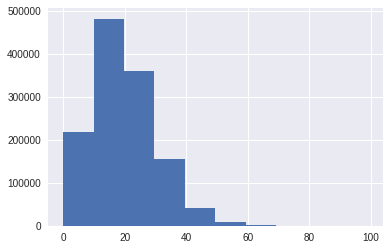

max= 99  min= 0  mean= 19.4408307723908  std= 10.480138336357472


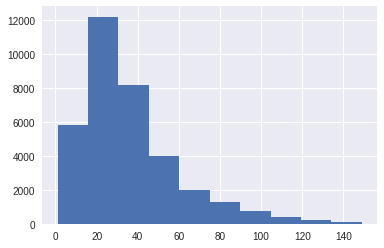

max= 149  min= 1  mean= 35.638101760694006  std= 24.101882365720236


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

ly = dfhan['lyrics']
lens = []#line lengths
linect = []#line count in  lyrics
for song in ly.values:
  lines = song.splitlines()
  if len(lines) < 150:
    linect.append(len(lines))
  for l in lines:
    if len(l)<100:
      lens.append(len(l))

plt.hist(lens)
plt.show()
print("max=",np.max(lens)," min=",np.min(lens)," mean=",np.mean(lens)," std=", np.std(lens))

plt.hist(linect)
plt.show()

print("max=",np.max(linect)," min=",np.min(linect)," mean=",np.mean(linect)," std=", np.std(linect))

df = dfhan.copy()


In [0]:
dfhancopy = df.copy()##################### can be used to reset dfhan to df state which is the dfhan state just before this cell
dfhan = dfhancopy.copy()
maxlines = 45
def seperateLines(xx):
    try:
        lines = xx.splitlines()
        return np.array(lines[:maxlines])
    except:
        print("Error--")
        return
      
dfhan['lyrics'] = dfhan['lyrics'].apply(seperateLines)

In [0]:
l = dfhan['lyrics'].head(1).values[0]
l.shape
df.shape

(35140, 6)

In [0]:
# split the dataset into training and validation datasets 
#train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['lyrics'], df['artist'])

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dfhan['lyrics'], dfhan['artist'],random_state=42)
train_x2, valid_x2, train_y2, valid_y2 = model_selection.train_test_split(dfhan['lyrics'], dfhan['artist'],random_state=42)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
  

In [0]:
print(dfhan['lyrics'].values[0].shape)
print(train_x.head(2).values[1].shape)
print(train_x.head(2).values[0])
print(train_x.shape, valid_x.shape)

(45,)
(20,)
['trying tell something' 'every time come near' 'got feeling message'
 'one want hear' 'deny want' 'know enough know' 'come right say'
 'trying let slow' 'let talk tears drop' 'change heart' 'well guess'
 'change heart' 'even wanted' 'change heart' 'kiss sends message'
 'detect signs' 'got enough understanding' 'lover realize' 'make love'
 'though give best' 'keeping heart distance' 'breaks confess'
 'change heart' 'well guess' 'change heart' 'even wanted' 'change heart'
 'baby everyone talk' 'change heart' 'notion' 'phase pass' 'mixed emotion'
 'change gonna last' 'baby let talk' 'tears drop' 'change heart'
 'well guess' 'change heart' 'even wanted' 'change heart' 'everyone talk'
 'change heart' 'losing losing' 'change heart' 'change heart']
(26355,) (8785,)


# Feature Engineering

In [0]:
#Count vectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['lyrics'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)
print(xtrain_count.shape)
print(xvalid_count.shape)


In [0]:
print(np.sum(xtrain_count[0]))
len(train_x.values[0].split())

155


155

In [0]:
#TF-IDF vectorizers

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['lyrics'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# # ngram level tf-idf 
# tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
# tfidf_vect_ngram.fit(df['lyrics'])
# xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
# xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [0]:
#FastText vectorizer

# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec', encoding='utf8')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')





In [0]:
#embeddings_index ,key:word, value: embedding array
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['lyrics'])
word_index = token.word_index

In [0]:
# # word level tf-idf
# tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_vect.fit(df['lyrics'])


########### HAN relatex
maxsenlen = 14
def textToseq(xx):
    try:
        #print(type(xx),xx.shape)
        return sequence.pad_sequences(token.texts_to_sequences(xx),maxlen=maxsenlen)
        #return tfidf_vect.transform(xx)
    except Exception as e:
        print(e)
        print("Error--")
        return
      
# train_x = train_x.apply(textToseq)
# valid_x =  valid_x.apply(textToseq)

print(train_x.head(1).values[0])

def reshapex(x):
  seq_x = np.zeros((x.shape[0],maxlines,maxsenlen), dtype=int)
  
  for i,val in enumerate(x.values):
    seq_x[i,0:val.shape[0],:] = val
   
  return seq_x
  

# train_seq_x = reshapex(train_x)
# valid_seq_x = reshapex(valid_x)

# print(train_seq_x.shape)
# print(train_seq_x[1])

####################################################333333

# convert text to sequence of tokens and pad them to ensure equal length vectors 
# train_seq_x = sequence.pad_sequences(train_x, maxlen=22)
# valid_seq_x = sequence.pad_sequences(valid_x, maxlen=22)

# create token-embedding mapping
embedding_matrix = numpy.random.rand(len(word_index) + 1, 300)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
      pass
      #print("Got none for :",word)
      print(word)

[[    0     0     0     0     0     0     0     0     0     0     0   258
     27    99]
 [    0     0     0     0     0     0     0     0     0     0    52    11
     16   503]
 [    0     0     0     0     0     0     0     0     0     0     0     4
    188  1230]
 [    0     0     0     0     0     0     0     0     0     0     0     7
     14    76]
 [    0     0     0     0     0     0     0     0     0     0     0     0
   1510    14]
 [    0     0     0     0     0     0     0     0     0     0     0     3
    148     3]
 [    0     0     0     0     0     0     0     0     0     0     0    16
     25    18]
 [    0     0     0     0     0     0     0     0     0     0     0   258
     12   358]
 [    0     0     0     0     0     0     0     0     0     0    12   144
    259   350]
 [    0     0     0     0     0     0     0     0     0     0     0     0
    150    28]
 [    0     0     0     0     0     0     0     0     0     0     0     0
     38   248]
 [    0     0     0  

KeyboardInterrupt: ignored

In [0]:
print(embedding_matrix.shape, train_seq_x.shape)
#print(embedding_matrix[:10])
#print(train_seq_x.head(1).values[0].shape)
for j in train_seq_x[15]:
  print(j,)
  break

(79762, 300) (26355, 45, 14)
[  0   0   0   0   0   0   0   0   0   0   0   0   0 141]


In [0]:
#Word2Vec vectorizer
!pip3 install gensim
from gensim.models import KeyedVectors

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin', binary=True)

dog = model['dog']
print(dog.shape)
print(dog[:10])

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 14.8MB/s 
    100% |████████████████████████████████| 133kB 26.7MB/s 
    100% |████████████████████████████████| 61kB 19.1MB/s 
    100% |████████████████████████████████| 4.8MB 5.4MB/s 
    100% |████████████████████████████████| 552kB 24.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
(300,)
[ 0.01719806 -0.00749344 -0.05798202  0.05405104 -0.02833585  0.01924545
  0.01965492 -0.02768068 -0.00515942 -0.02129283]


In [0]:
# create token-embedding mapping
w_embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    try:
        w_embedding_vector = model[word]
        w_embedding_matrix[i] = w_embedding_vector
    except:
        continue

In [0]:
w_embedding_matrix.shape

(63456, 300)

# Model Building

In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions, valid_y)

In [0]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
#from nltk.corpus import stopwords
#stop_words = stopwords.words('english')

In [0]:
# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical(train_y)
yvalid_enc = np_utils.to_categorical(valid_y)

In [0]:
# create a simple 3 layer sequential neural net
model = Sequential()

model.add(Dense(5000, input_dim=5000, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(5000, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(100))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(xtrain_tfidf, y=ytrain_enc, batch_size=64, 
          epochs=10, verbose=1, 
          validation_data=(xvalid_tfidf, yvalid_enc))

In [0]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=150,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(1000, dropout=0.3, recurrent_dropout=0.3))

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# #Need to restart to take effect
# !pip3 install pydot
# !pip3 install graphviz
# from keras.utils import plot_model
# plot_model(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 150, 300)          11918100  
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 150, 300)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_40 (Dense)             (None, 512)               51712     
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
__________

In [0]:
# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(train_seq_x, y=ytrain_enc, batch_size=128, epochs=100, 
          verbose=1, validation_data=(valid_seq_x, yvalid_enc))

In [0]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=70,
                     trainable=True))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(1000, dropout=0.3, recurrent_dropout=0.3)))

#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(train_seq_x, y=ytrain_enc, batch_size=128, epochs=100, 
          verbose=1, validation_data=(valid_seq_x, yvalid_enc))

In [0]:
################## HAN

from keras.engine.topology import Layer
from keras.models import Model
import keras.backend as K
import  keras.initializers as initializers
import  keras.constraints as constraints
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)
    
class MyLayer(Layer):

  # initialize the layer, and set an extra parameter axis. No need to include inputs parameter!
  def __init__(self, **kwargs):
      self.result = None
      super(MyLayer, self).__init__(**kwargs)

  # first use build function to define parameters, Creates the layer weights.
  # input_shape will automatic collect input shapes to build layer
  def build(self, input_shape):
      print(input_shape,"---")
      super(MyLayer, self).build(input_shape)

  # This is where the layer's logic lives. In this example, I just concat two tensors.
  def call(self, inputs, **kwargs):
      x = inputs[0]
      a = inputs[1]
      weighted_input = x * a
      return K.sum(weighted_input, axis=1)


  # return output shape
  def compute_output_shape(self, input_shape):
      return  input_shape[0][0],input_shape[0][-1]
    
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.predictmode = False
        super(AttentionWithContext, self).__init__(**kwargs)
    
    def setPredictmode(self,prmode=False):
        self.predictmode = prmode

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)
        
        print("ait.shape=",ait.shape, "uit.shape=",uit.shape,mask)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None: 
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        print(K.sum(a), K.sum(a, axis=1, keepdims=True))
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        return a
#         weighted_input = x * a
# #         if K.learning_phase() == 0:# test time
# #           K.Print(a)
#         K.print(a,[a])
#         return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[1]

#################### HAN ####################33
from keras.layers import Input,TimeDistributed
from keras import regularizers

l2_reg = None#regularizers.l2(0.004)
# https://medium.com/analytics-vidhya/hierarchical-attention-networks-d220318cf87e
embedding_layer = Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     #weights=[w_embedding_matrix],
                     input_length=maxsenlen,
                     trainable=True)
max_senten_len = maxsenlen #==10
# Words level attention model
word_input = Input(shape=(max_senten_len,), dtype='float32')
word_sequences = embedding_layer(word_input)
word_lstm = Bidirectional(LSTM(80, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
word_dense = TimeDistributed(Dense(100, kernel_regularizer=l2_reg))(word_lstm)
word_att_model = AttentionWithContext()
word_att = word_att_model(word_dense)
word_mylayer = MyLayer()([word_dense,word_att])
wordEncoder = Model(word_input, word_mylayer)
wordEncoder.summary()

# Sentence level attention model
max_senten_num= maxlines
sent_input = Input(shape=(max_senten_num, max_senten_len), dtype='float32')
sent_encoder = TimeDistributed(wordEncoder)(sent_input)
sent_lstm = Bidirectional(LSTM(80, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
sent_dense = TimeDistributed(Dense(100, kernel_regularizer=l2_reg))(sent_lstm)
sent_att_model = AttentionWithContext()
sent_att = Dropout(0.5)(sent_att_model(sent_dense))
sent_mylayer = MyLayer()([sent_dense,sent_att])
dense1 = Dropout(0.5)(Dense(50, activation='relu')(sent_mylayer))

preds = Dense(100, activation='softmax')(dense1)
model = Model(sent_input, preds)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.002),metrics=['acc'])


model.summary()
# #Need to restart to take effect
#!pip3 install pydot
#!apt-get install graphviz
# from keras.utils import plot_model
# plot_model(model,to_file="han.png",show_shapes=True)

ait.shape= (?, 14) uit.shape= (?, 14, 100) None
Tensor("attention_with_context_25/Sum:0", shape=(), dtype=float32) Tensor("attention_with_context_25/Sum_1:0", shape=(?, 1), dtype=float32)
[(None, 14, 100), (None, 14)] ---
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 14)           0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 14, 300)      23928600    input_29[0][0]                   
__________________________________________________________________________________________________
bidirectional_26 (Bidirectional (None, 14, 160)      243840      embedding_18[0][0]               
_____________________________________________________________________________________

In [0]:
# from google.colab import files
# files.download("han.png")
probs

[]

In [0]:

model.fit(train_seq_x, y=ytrain_enc, batch_size=128, epochs=200, 
          verbose=1, validation_data=(valid_seq_x, yvalid_enc))

Train on 26355 samples, validate on 8785 samples
Epoch 1/200
26355/26355 [==============================] - 136s 5ms/step - loss: 0.9874 - acc: 0.7265 - val_loss: 4.8554 - val_acc: 0.2932
Epoch 2/200
26355/26355 [==============================] - 136s 5ms/step - loss: 0.8219 - acc: 0.7693 - val_loss: 5.2690 - val_acc: 0.2983
Epoch 3/200
26355/26355 [==============================] - 136s 5ms/step - loss: 0.6919 - acc: 0.8031 - val_loss: 5.6007 - val_acc: 0.2973
Epoch 4/200
26355/26355 [==============================] - 136s 5ms/step - loss: 0.5945 - acc: 0.8310 - val_loss: 5.7468 - val_acc: 0.3034
Epoch 5/200
13056/26355 [=============>................] - ETA: 1:01 - loss: 0.4829 - acc: 0.8632

KeyboardInterrupt: ignored

attention_with_context_25
(45, 14, 1) (1, 45, 1) (8785, 45, 14)
[[[8.6575914e-05]
  [8.7566485e-05]
  [1.1182672e-04]
  [5.0022190e-05]
  [5.1333052e-03]
  [9.9289906e-04]
  [2.1108312e-03]
  [2.8649722e-03]
  [8.1077073e-04]
  [2.5830459e-04]
  [2.1791620e-05]
  [5.0724277e-05]
  [1.1843620e-01]
  [1.5000005e-03]
  [3.2825321e-02]
  [1.1177756e-01]
  [5.1175430e-02]
  [1.0656988e-03]
  [6.2029357e-03]
  [9.4944678e-02]
  [1.9645944e-01]
  [1.4541052e-04]
  [7.2141521e-02]
  [6.2374849e-05]
  [7.7228276e-03]
  [1.0229007e-03]
  [7.0855245e-02]
  [5.9751904e-04]
  [5.2653959e-05]
  [6.2530242e-05]
  [1.2927160e-03]
  [4.2737469e-05]
  [1.1357465e-04]
  [1.7238912e-01]
  [4.0950519e-03]
  [5.7313254e-04]
  [5.8957483e-03]
  [1.7753405e-03]
  [1.6311511e-04]
  [2.0204441e-04]
  [2.2004826e-04]
  [1.8210302e-04]
  [2.1894239e-02]
  [2.2237611e-03]
  [9.3074227e-03]]]
100/100 [==============================] - 1s 6ms/step
j= 3
96    [ooh baby, ooh baby, love way make feel, slows...
Name: ly

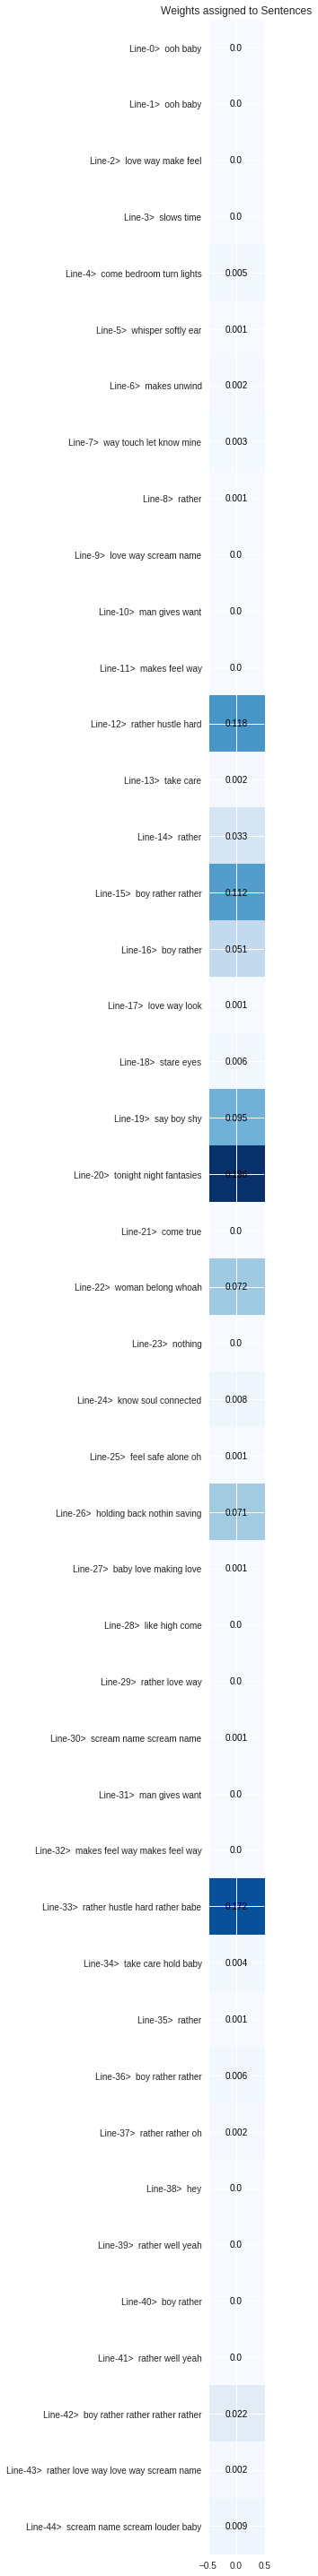

In [0]:
# word_att_model.setPredictmode(True)
# sent_att_model.setPredictmode(True)
# predictmode = True
# K.set_learning_phase(0)
layer_name = 'time_distributed_73'
print(model.layers[1].layer.layers[4].name)
get_intermediate_output = K.function([wordEncoder.layers[0].input],
                                  [wordEncoder.layers[4].output])
get_intermediate_output_sent = K.function([model.layers[0].input],
                                  [model.layers[4].output])

# output in test mode = 0
intermediate_output = get_intermediate_output([valid_seq_x[17]])[0]
intermediate_output_sent = get_intermediate_output_sent([valid_seq_x[17]])[0]
print(intermediate_output.shape,intermediate_output_sent.shape,valid_seq_x.shape)
print(intermediate_output_sent)
def predict(x):
  pr = model.predict(x, batch_size=None, verbose=1, steps=None)
  N = x.shape[0]
  ypr = np.argmax(pr, axis=1)
  return ypr

# # print(predict(valid_seq_x[:31]),"\n",np.argmax(yvalid_enc[:31],axis=1))
ypr = predict(valid_seq_x[:100])
# print(ypr)
# print(probs)
for j in range(100):
  if ypr[j] == np.argmax(yvalid_enc[j]):
              print("j=",j)
              break
print(valid_x2.iloc[[17]])        
song=[]       
for line in valid_x2.iloc[[17]].values[0]:
  print(line)
  song.append(line)
print(valid_y2.iloc[[17]])
  
# for j,i in enumerate(valid_y2.head(17)):
#   print(j,i)
def heatmap(data,song):
  #print(song[0],len(song))
#   data = numpy.round(data.reshape(data.shape[0],-1),3)
  data = numpy.round(data.reshape(data.shape[1],1),3)
  print("----here",data.shape)
  #https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
  import numpy as np
  import matplotlib
  import matplotlib.pyplot as plt
  # sphinx_gallery_thumbnail_number = 2
  N,M = data.shape

#   lines = ["Line-"+str(i) for i in range(N)]
  lines = ["Line-"+str(i)+">  "+song[i] for i in range(N)]
  #farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening","Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
  fig, ax = plt.subplots(figsize=(40,40))
  im = ax.imshow(data,cmap='Blues')
  

  # We want to show all ticks...
  #ax.set_xticks(np.arange(len(farmers)))
  ax.set_yticks(np.arange(len(lines)))
  # ... and label them with the respective list entries
  #ax.set_xticklabels(farmers)
  ax.set_yticklabels(lines)

  # Rotate the tick labels and set their alignment.
  #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
  #         rotation_mode="anchor")

  # Loop over data dimensions and create text annotations.
  for i in range(len(lines)):
      ly =  song[i].split()
      ly.reverse()
      #print("ly=",ly,song[i])
      for j in range(M):
          txt = str(data[i,j])
#           if len(ly)>=M-j:
#             txt = ly[M-j-1] + "\n" + txt
          
#           text = ax.text(j, i, txt,ha="center", va="center", bbox=dict(facecolor='y', alpha=0.5))
          text = ax.text(j, i, txt,ha="center", va="center", color='black')

  ax.set_title("Weights assigned to Sentences")
  fig.tight_layout()
  plt.savefig("./han11word.jpeg")
  plt.show()

# k=0
# for j in intermediate_output_sent.reshape(-1):
#   intermediate_output[k] *= j
#   k +=1
heatmap(intermediate_output_sent,song)
# heatmap2()

In [0]:
!ls -alh
files.download('han11word.jpeg')

total 3.5G
drwxr-xr-x 1 root root 4.0K Dec  6 07:55 .
drwxr-xr-x 1 root root 4.0K Dec  6 05:53 ..
-rw-r--r-- 1 root root 2.5K Dec  6 05:54 adc.json
drwxr-xr-x 1 root root 4.0K Dec  6 05:54 .config
-rw-r--r-- 1 root root 346M Dec  6 05:55 GoogleNews-vectors-negative300-SLIM.bin
-rw-r--r-- 1 root root 230K Dec  6 09:25 han11word.jpeg
-rw-r--r-- 1 root root 310M Jan 11  2017 lyrics.csv
-rw-r--r-- 1 root root  99M Dec  6 05:54 lyrics.csv.zip
drwxr-xr-x 2 root root 4.0K Dec  4 21:01 sample_data
-rw-r--r-- 1 root root 2.2G Mar 14  2018 wiki-news-300d-1M.vec
-rw-r--r-- 1 root root 651M Dec  6 05:55 wiki-news-300d-1M.vec.zip
